In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("data/centralNervousSystem_outcome.csv")
data_length = data.shape[1]
data_length

7130

In [3]:
column = []
for i in range(data_length):
    column.append("atribut"+str(i))

In [4]:
data = pd.read_csv("data/centralNervousSystem_outcome.csv", header=None, names=column)
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut7120,atribut7121,atribut7122,atribut7123,atribut7124,atribut7125,atribut7126,atribut7127,atribut7128,atribut7129
0,-60,-109,45,22,7,-61,-211,-102,-20,98,...,1082,-12,44,-48,123,89,-25,56,-63,Class1
1,-159,-113,-62,-16,-160,-395,97,-157,15,-8,...,1295,-677,-452,-750,1273,-1,-750,-45,-293,Class1
2,-119,-31,4,-11,-197,-541,-277,-166,17,392,...,592,55,88,-37,310,159,11,2,2,Class1
3,41,9,-256,370,-302,-680,254,31,186,358,...,433,71,-237,-166,52,-48,-183,328,-244,Class1
4,-165,-57,171,216,-692,-381,762,-6,44,216,...,2160,-120,-82,-25,3888,393,-38,190,38,Class1


In [5]:
data = data.rename(columns={'atribut7129': 'status'})
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut7120,atribut7121,atribut7122,atribut7123,atribut7124,atribut7125,atribut7126,atribut7127,atribut7128,status
0,-60,-109,45,22,7,-61,-211,-102,-20,98,...,1082,-12,44,-48,123,89,-25,56,-63,Class1
1,-159,-113,-62,-16,-160,-395,97,-157,15,-8,...,1295,-677,-452,-750,1273,-1,-750,-45,-293,Class1
2,-119,-31,4,-11,-197,-541,-277,-166,17,392,...,592,55,88,-37,310,159,11,2,2,Class1
3,41,9,-256,370,-302,-680,254,31,186,358,...,433,71,-237,-166,52,-48,-183,328,-244,Class1
4,-165,-57,171,216,-692,-381,762,-6,44,216,...,2160,-120,-82,-25,3888,393,-38,190,38,Class1


In [6]:
data.loc[data['status'] == 'Class0', ['status']] = 0
data.loc[data['status'] == 'Class1', ['status']] = 1
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut7120,atribut7121,atribut7122,atribut7123,atribut7124,atribut7125,atribut7126,atribut7127,atribut7128,status
0,-60,-109,45,22,7,-61,-211,-102,-20,98,...,1082,-12,44,-48,123,89,-25,56,-63,1
1,-159,-113,-62,-16,-160,-395,97,-157,15,-8,...,1295,-677,-452,-750,1273,-1,-750,-45,-293,1
2,-119,-31,4,-11,-197,-541,-277,-166,17,392,...,592,55,88,-37,310,159,11,2,2,1
3,41,9,-256,370,-302,-680,254,31,186,358,...,433,71,-237,-166,52,-48,-183,328,-244,1
4,-165,-57,171,216,-692,-381,762,-6,44,216,...,2160,-120,-82,-25,3888,393,-38,190,38,1


In [7]:
data = data.apply(pd.to_numeric)

In [8]:
data['status'].value_counts()

0    39
1    21
Name: status, dtype: int64

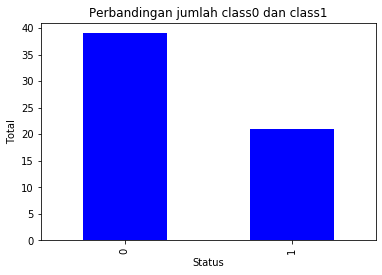

In [9]:
import matplotlib.pyplot as plt
data['status'].value_counts().plot(kind='bar', color="b")
plt.title("Perbandingan jumlah class0 dan class1")
plt.xlabel('Status')
plt.ylabel('Total')
plt.show()

In [10]:
data.describe()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut7120,atribut7121,atribut7122,atribut7123,atribut7124,atribut7125,atribut7126,atribut7127,atribut7128,status
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,-95.083333,-91.650000,8.366667,95.033333,-231.966667,-343.350000,53.616667,-160.266667,57.316667,129.033333,...,1005.216667,40.350000,42.233333,-104.583333,828.400000,239.316667,-46.716667,145.400000,-73.616667,0.350000
std,120.779852,119.931736,122.938040,156.914526,179.484853,215.094841,415.350417,121.334091,142.484789,183.066531,...,543.947190,253.988978,217.455966,169.772858,725.377101,222.140473,175.811734,210.018014,125.839701,0.480995
min,-492.000000,-414.000000,-300.000000,-370.000000,-746.000000,-1216.000000,-1231.000000,-528.000000,-238.000000,-462.000000,...,52.000000,-677.000000,-452.000000,-750.000000,-140.000000,-53.000000,-750.000000,-350.000000,-466.000000,0.000000
25%,-152.250000,-131.500000,-62.250000,-4.000000,-312.000000,-407.500000,-190.000000,-192.500000,-12.250000,6.000000,...,608.500000,-53.250000,-56.750000,-121.750000,421.250000,92.000000,-61.250000,38.500000,-103.500000,0.000000
50%,-82.500000,-76.500000,18.500000,74.000000,-173.000000,-300.000000,72.500000,-134.500000,30.000000,107.000000,...,941.500000,64.500000,62.500000,-79.000000,651.500000,205.500000,-25.000000,116.000000,-41.000000,0.000000
75%,-26.750000,-30.250000,91.000000,214.250000,-111.250000,-219.250000,337.250000,-77.000000,114.250000,250.750000,...,1238.000000,133.000000,151.500000,-9.750000,1032.250000,319.500000,20.000000,190.500000,-4.000000,1.000000
max,216.000000,238.000000,362.000000,378.000000,81.000000,34.000000,896.000000,31.000000,683.000000,497.000000,...,2936.000000,730.000000,629.000000,110.000000,3888.000000,1261.000000,346.000000,788.000000,184.000000,1.000000


In [11]:
X = data.drop(['status'],axis=1)
y = data['status']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=45)

In [13]:
def minmax_scaler(X_train_, X_test_):
    scaler = MinMaxScaler()
    X_train_ = scaler.fit_transform(X_train_)
    X_test_ = scaler.transform(X_test_)
    return X_train_,X_test_

In [14]:
X_train_, X_test_ = minmax_scaler(X_train,X_test)
X_train = pd.DataFrame(data=X_train_, columns=X_train.columns)
X_test = pd.DataFrame(data=X_test_, columns=X_test.columns)

In [66]:
lasso = Lasso(alpha=0.01, max_iter=10e5)
lasso.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [67]:
coeff = pd.DataFrame({
    "coef" : lasso.coef_!=0
})
coeff_terpilih = np.sum(lasso.coef_!=0)
coeff_terpilih

35

In [68]:
fitur = coeff[coeff["coef"]==True].index.tolist()

In [69]:
X_trainLasso = X_train[["atribut"+str(i) for i in fitur]]
X_trainLasso.head()

,atribut60,atribut221,atribut347,atribut450,atribut676,atribut764,atribut843,atribut1053,atribut1351,atribut1696,...,atribut5388,atribut5599,atribut5652,atribut5811,atribut5956,atribut6164,atribut6168,atribut6178,atribut6251,atribut6332
0,0.219020,0.529716,0.287016,0.254130,0.457569,0.388740,0.504249,0.036283,0.355381,0.350966,...,0.747368,0.775414,0.116860,0.025985,0.078092,0.419820,0.491100,0.779970,0.065991,0.452165
1,0.443804,0.152455,0.772210,0.642948,0.600917,0.233244,0.232295,0.427018,0.050232,0.513014,...,0.000000,0.413712,0.586047,0.068669,0.898188,0.522523,0.954545,0.207092,0.226520,0.470292
2,0.193084,0.465116,0.225513,0.871665,0.389908,0.337802,0.471671,0.171140,0.231856,0.120907,...,0.463158,0.258471,0.348256,0.124307,0.678038,0.311712,0.197711,0.143801,0.113984,0.348439
3,0.452450,0.751938,0.594533,0.151207,0.861239,0.697051,0.677054,0.161699,0.782624,0.447523,...,0.842105,0.630418,1.000000,0.061030,0.881930,0.491892,0.188493,0.366530,0.093711,0.469285
4,0.097983,0.648579,0.072893,0.175349,0.360092,0.268097,0.434844,0.037671,0.618699,0.517212,...,0.808772,0.464145,0.104070,0.038640,0.275053,0.284685,0.070566,0.186430,0.075507,0.540785


In [70]:
X_testLasso = X_test[["atribut"+str(i) for i in fitur]]
X_testLasso.head()

,atribut60,atribut221,atribut347,atribut450,atribut676,atribut764,atribut843,atribut1053,atribut1351,atribut1696,...,atribut5388,atribut5599,atribut5652,atribut5811,atribut5956,atribut6164,atribut6168,atribut6178,atribut6251,atribut6332
0,0.314121,0.516796,0.170843,0.222363,0.150229,0.085791,0.491501,-0.013375,0.704147,0.248531,...,0.642105,0.415288,0.144767,0.009660,0.029051,0.405405,0.310235,0.423120,0.506827,0.507553
1,0.907781,0.485788,0.578588,0.735705,0.908257,0.332440,0.559490,0.340429,0.114766,0.642317,...,0.394737,0.483058,0.516860,0.521791,0.860341,0.518919,0.539733,0.300912,0.063922,0.423968
2,0.276657,0.395349,0.646925,0.412961,0.488532,0.434316,0.514164,0.145455,0.751341,0.655751,...,0.603509,0.490938,0.704070,0.181294,0.690565,0.237838,0.079466,0.325949,0.036202,0.006042
3,-0.337176,0.751938,0.362187,0.108005,0.319954,0.064343,0.563739,0.754674,0.192349,0.212427,...,0.617544,0.317573,0.038953,0.168264,0.131130,0.717117,0.460267,0.064501,0.477245,0.278953
4,-0.734870,1.118863,1.277904,0.829733,0.393349,1.136729,0.692635,0.011940,0.023954,0.517212,...,0.287719,0.547675,-0.087791,0.025535,0.088753,0.158559,0.514304,0.150316,0.033513,0.444109


In [71]:
model_rfg = RandomForestClassifier()

In [72]:
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto', 'log2'],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
                     }

In [73]:
random_search = RandomizedSearchCV(estimator=model_rfg,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8,
                                   n_jobs = -1)

# Fit the random search model
random_search.fit(X_trainLasso, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   54.8s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [74]:
print("Best Params : ",random_search.best_params_)
print()
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, random_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'bootstrap': False}

0.917 (+/-0.118) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.896 (+/-0.156) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.896 (+/-0.156) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.917 (+/-0.118) for {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False}
0.896 (+/-0.156) for {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.875 (+/-0.204) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True}
0.917 (+/-0.118) for {'n_estimators': 400, 'min_samples_split': 2, '

In [75]:
random_search.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'bootstrap': False}

In [76]:
grid_params = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto'],
               'min_samples_split': [5],
               'min_samples_leaf': [4],
               'bootstrap': [False]
                     }

In [77]:
grid_search = GridSearchCV(estimator=model_rfg,
                                   param_grid=grid_params,
                                   cv=3, 
                                   verbose=1, 
                                   n_jobs = -1)

grid_search.fit(X_trainLasso, y_train)
print("Best Params : ",grid_search.best_params_)
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    5.4s finished


Best Params :  {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 400}

0.917 (+/-0.118) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
0.938 (+/-0.102) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 400}
0.938 (+/-0.102) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 600}
0.917 (+/-0.118) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 800}
0.938 (+/-0.102) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 1000}


In [78]:
classifier = grid_search.best_estimator_

In [79]:
classifier.fit(X_trainLasso, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
prediksi = classifier.predict(X_testLasso)
prediksi

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [81]:
pd.DataFrame({
    "status" : y_test,
    "status predicted" : prediksi
})

,status,status predicted
5,1,0
26,0,0
57,0,0
39,0,0
36,0,0
50,0,0
42,0,0
19,1,0
25,0,0
18,1,0


In [82]:
accuracy_score(y_test,prediksi)

0.75

In [83]:
print(classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       0.00      0.00      0.00         3

    accuracy                           0.75        12
   macro avg       0.38      0.50      0.43        12
weighted avg       0.56      0.75      0.64        12



In [84]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test, prediksi)
precision


0.0

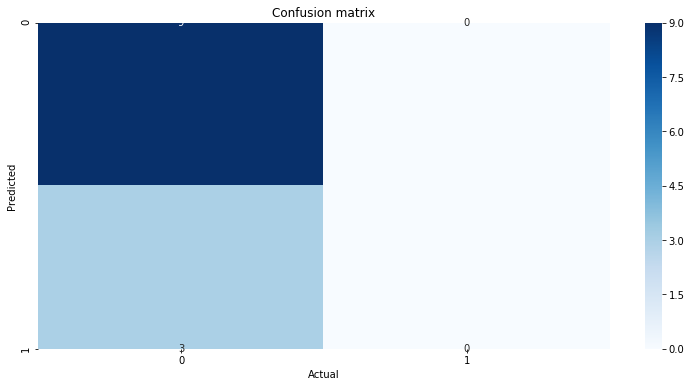

In [85]:
aux_df = data[['status']].drop_duplicates().sort_values('status')
conf_matrix = confusion_matrix(y_test, prediksi)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['status'].values, 
            yticklabels=aux_df['status'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [86]:
confusion_matrix(y_test,prediksi)

array([[9, 0],
       [3, 0]], dtype=int64)